# An inferential problem: The Gender Wage Gap

## Data analysis

In [140]:
import pandas as pd
import numpy as np
import pyreadr as rr # package to use data form R format
import math

In [141]:
#!pip install pyreadr==0.4.2

In [142]:
#rdata_read = pyreadr.read_r("../../data/wage2015_subsample_inference.Rdata")

data  = pd.read_csv(r'C:/Users/Frank/Downloads/wage2015_subsample_inference.csv')

# Extracting the data frame from rdata_read
#data = rdata_read[ 'data' ]
data['occ']=pd.Categorical(data.occ)
data['occ2']=pd.Categorical(data.occ2)
data['ind']=pd.Categorical(data.ind)
data['ind2']=pd.Categorical(data.ind2)

data

,rownames,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,...,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
0,10,9.615385,2.263364,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,7.0,0.49,0.343,0.2401,3600.0,11,8370.0,18
1,12,48.076923,3.872802,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,31.0,9.61,29.791,92.3521,3050.0,10,5070.0,9
2,15,11.057692,2.403126,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,18.0,3.24,5.832,10.4976,6260.0,19,770.0,4
3,18,13.942308,2.634928,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,25.0,6.25,15.625,39.0625,420.0,1,6990.0,12
4,19,28.846154,3.361977,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,22.0,4.84,10.648,23.4256,2015.0,6,9470.0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5145,32620,14.769231,2.692546,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,9.0,0.81,0.729,0.6561,4700.0,16,4970.0,9
5146,32624,23.076923,3.138833,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,12.0,1.44,1.728,2.0736,4110.0,13,8680.0,20
5147,32626,38.461538,3.649659,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,11.0,1.21,1.331,1.4641,1550.0,4,3680.0,6
5148,32631,32.967033,3.495508,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,10.0,1.00,1.000,1.0000,2920.0,9,6570.0,11


In [143]:
data.shape

(5150, 21)

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5150 entries, 0 to 5149
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   rownames  5150 non-null   int64   
 1   wage      5150 non-null   float64 
 2   lwage     5150 non-null   float64 
 3   sex       5150 non-null   float64 
 4   shs       5150 non-null   float64 
 5   hsg       5150 non-null   float64 
 6   scl       5150 non-null   float64 
 7   clg       5150 non-null   float64 
 8   ad        5150 non-null   float64 
 9   mw        5150 non-null   float64 
 10  so        5150 non-null   float64 
 11  we        5150 non-null   float64 
 12  ne        5150 non-null   float64 
 13  exp1      5150 non-null   float64 
 14  exp2      5150 non-null   float64 
 15  exp3      5150 non-null   float64 
 16  exp4      5150 non-null   float64 
 17  occ       5150 non-null   category
 18  occ2      5150 non-null   category
 19  ind       5150 non-null   category
 20  ind2    

***Variable description***

- occ : occupational classification
- ind : industry classification
- lwage : log hourly wage
- sex : gender (1 female) (0 male)
- shs : some high school
- hsg : High school graduated
- scl : Some College
- clg: College Graduate
- ad: Advanced Degree
- ne: Northeast
- mw: Midwest
- so: South
- we: West
- exp1: experience

In this case, we Focus on the subset of college-advanced-educated workers. he analysis should be analogous to what we’ve presented – explaining basic, control and partialling out model, generating point estimates and standard errors.

In [145]:
data = data[(data.scl == 1) | (data.ad == 1) | (data.clg == 1)]
data

,rownames,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,...,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
0,10,9.615385,2.263364,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,7.0,0.49,0.343,0.2401,3600.0,11,8370.0,18
1,12,48.076923,3.872802,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,31.0,9.61,29.791,92.3521,3050.0,10,5070.0,9
3,18,13.942308,2.634928,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,25.0,6.25,15.625,39.0625,420.0,1,6990.0,12
4,19,28.846154,3.361977,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,22.0,4.84,10.648,23.4256,2015.0,6,9470.0,22
5,30,11.730769,2.462215,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.01,0.001,0.0001,1650.0,5,7460.0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5144,32619,13.846154,2.628007,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,10.0,1.00,1.000,1.0000,800.0,2,770.0,4
5145,32620,14.769231,2.692546,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,9.0,0.81,0.729,0.6561,4700.0,16,4970.0,9
5146,32624,23.076923,3.138833,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,12.0,1.44,1.728,2.0736,4110.0,13,8680.0,20
5147,32626,38.461538,3.649659,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,11.0,1.21,1.331,1.4641,1550.0,4,3680.0,6


In [146]:
data.shape

(3774, 21)

To start our (causal) analysis, we compare the sample means given gender:

In [147]:
Z = data[ ["lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"] ]

data_female = data[data[ 'sex' ] == 1 ]
Z_female = data_female[ ["lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"] ]

data_male = data[ data[ 'sex' ] == 0 ]
Z_male = data_male[ [ "lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1" ] ]


table = np.zeros( (12, 3) )
table[:, 0] = Z.mean().values
table[:, 1] = Z_male.mean().values
table[:, 2] = Z_female.mean().values
table_pandas = pd.DataFrame( table, columns = [ 'All', 'Men', 'Women']) # from table to dataframe
table_pandas.index = ["Log Wage","Sex","Some High School","High School Graduate","Some College","Gollage Graduate","Advanced Degree", "Northeast","Midwest","South","West","Experience"]
table_html = table_pandas.to_html() # html format

table_pandas

,All,Men,Women
Log Wage,3.062748,3.099449,3.024417
Sex,0.489136,0.000000,1.000000
Some High School,0.000000,0.000000,0.000000
High School Graduate,0.000000,0.000000,0.000000
Some College,0.379438,0.405602,0.352113
Gollage Graduate,0.433492,0.436203,0.430661
Advanced Degree,0.187069,0.158195,0.217226
Northeast,0.229200,0.219917,0.238895
Midwest,0.249868,0.245851,0.254063
South,0.298357,0.303423,0.293066


In [148]:
print( table_html )

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>All</th>
      <th>Men</th>
      <th>Women</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Log Wage</th>
      <td>3.062748</td>
      <td>3.099449</td>
      <td>3.024417</td>
    </tr>
    <tr>
      <th>Sex</th>
      <td>0.489136</td>
      <td>0.000000</td>
      <td>1.000000</td>
    </tr>
    <tr>
      <th>Some High School</th>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>High School Graduate</th>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>Some College</th>
      <td>0.379438</td>
      <td>0.405602</td>
      <td>0.352113</td>
    </tr>
    <tr>
      <th>Gollage Graduate</th>
      <td>0.433492</td>
      <td>0.436203</td>
      <td>0.430661</td>
    </tr>
    <tr>
      <th>Advanced Degree</th>
      <td>0.187069</td>
      <td>0.158195</td>
      

In particular, the table above shows that the difference in average logwage between men and women is equal to  0,075

In [149]:
data_female['lwage'].mean()- data_male['lwage'].mean()

-0.07503200512596608

Thus, the unconditional gender wage gap is about 7.5% for the group of never married workers (women get paid less on average in our sample). We also observe that never married working women are relatively more educated than working men and have lower working experience.

In [150]:
rdata_read = rr.read_r(r"../../../data/wage2015_subsample_inference.Rdata")

xx
# Extracting the data frame from rdata_read
data = rdata_read[ 'data' ]


data.shape

PyreadrError: File b'../../../data/wage2015_subsample_inference.Rdata' does not exist!

This unconditional (predictive) effect of gender equals the coefficient $\beta$ in the univariate ols regression of $Y$ on $D$:

\begin{align}
\log(Y) &=\beta D + \epsilon.
\end{align}

We verify this by running an ols regression in R.

In [151]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [152]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [153]:
nocontrol_model = smf.ols( formula = 'lwage ~ sex', data = data )
nocontrol_est = nocontrol_model.fit().summary2().tables[1]['Coef.']['sex']
nocontrol_est
nocontrol_se2 = nocontrol_model.fit().summary2().tables[1]['Std.Err.']['sex']


# robust standar erros
HCV_coefs = nocontrol_model.fit().cov_HC0
nocontrol_se = np.power( HCV_coefs.diagonal() , 0.5)[1]
nocontrol_se

# print unconditional effect of gender and the corresponding standard error

print( f'The estimated gender coefficient is {nocontrol_est} and the corresponding standard error is {nocontrol_se2}' )
print( f'The estimated gender coefficient is {nocontrol_est} and the corresponding robust standard error is {nocontrol_se}','\n' )


# confidence interval
nocontrol_model.fit().conf_int( alpha=0.05 ).loc[['sex']]


The estimated gender coefficient is -0.07503200512595819 and the corresponding standard error is 0.018373837141543378
The estimated gender coefficient is -0.07503200512595819 and the corresponding robust standard error is 0.018342600934807336 



,0,1
sex,-0.111056,-0.039008


Note that the standard error is computed with the *R* package *sandwich* to be robust to heteroskedasticity. 


Next, we run an ols regression of $Y$ on $(D,W)$ to control for the effect of covariates summarized in $W$:

\begin{align}
\log(Y) &=\beta_1 D  + \beta_2' W + \epsilon.
\end{align}

Here, we are considering the flexible model from the previous lab. Hence, $W$ controls for experience, education, region, and occupation and industry indicators plus transformations and two-way interactions.

Let us run the ols regression with controls.

## Ols regression with controls

In [154]:
flex = 'lwage ~ sex + (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+occ2+ind2+mw+so+we)'

# The smf api replicates R script when it transform data
control_model = smf.ols( formula = flex, data = data )
control_est = control_model.fit().summary2().tables[1]['Coef.']['sex']

print(control_model.fit().summary2().tables[1])

HCV_coefs = control_model.fit().cov_HC0
control_se = np.power( HCV_coefs.diagonal() , 0.5)[42]  # error standard for sex's coefficients 

control_se

print( f"Coefficient for OLS with controls {control_est} and the corresponding robust standard error is {control_se}" )

# confidence interval
control_model.fit().conf_int( alpha=0.05 ).loc[['sex']]


              Coef.  Std.Err.         t         P>|t|    [0.025    0.975]
Intercept  3.880838  0.463424  8.374276  7.905787e-17  2.972233  4.789442
occ2[T.2]  0.148912  0.134319  1.108643  2.676598e-01 -0.114439  0.412263
occ2[T.3]  0.151683  0.173250  0.875516  3.813527e-01 -0.187997  0.491363
occ2[T.4]  0.024109  0.189196  0.127429  8.986084e-01 -0.346835  0.395053
occ2[T.5] -0.435165  0.197117 -2.207651  2.733256e-02 -0.821639 -0.048691
...             ...       ...       ...           ...       ...       ...
exp4:scl   0.024112  0.025867  0.932148  3.513237e-01 -0.026604  0.074829
exp4:clg   0.008900  0.023652  0.376285  7.067278e-01 -0.037473  0.055273
exp4:mw    0.012197  0.022784  0.535335  5.924519e-01 -0.032474  0.056868
exp4:so    0.006360  0.019596  0.324536  7.455511e-01 -0.032061  0.044780
exp4:we    0.033250  0.020541  1.618716  1.055976e-01 -0.007023  0.073524

[246 rows x 6 columns]
Coefficient for OLS with controls -0.06763389814419338 and the corresponding robust stan

,0,1
sex,-0.101899,-0.033369


In [155]:
control_model 

The estimated regression coefficient  𝛽1≈−0.0676 measures how our linear prediction of wage changes if we set the gender variable  𝐷 from 0 to 1, holding the controls  𝑊 fixed. We can call this the predictive effect (PE), as it measures the impact of a variable on the prediction we make. Overall, we see that the unconditional wage gap of size  8 % for women decreases to about  7
 % after controlling for worker characteristics.


Next, we are using the Frisch-Waugh-Lovell theorem from the lecture partialling-out the linear effect of the controls via ols.

## Partialling-Out using ols

In [156]:
# models
# model for Y
flex_y = 'lwage ~  (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+occ2+ind2+mw+so+we)'
# model for D
flex_d = 'sex ~ (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+occ2+ind2+mw+so+we)' 

# partialling-out the linear effect of W from Y
t_Y = smf.ols( formula = flex_y , data = data ).fit().resid

# partialling-out the linear effect of W from D
t_D = smf.ols( formula = flex_d , data = data ).fit().resid


data_res = pd.DataFrame( np.vstack(( t_Y.values , t_D.values )).T , columns = [ 't_Y', 't_D' ] )


# regression of Y on D after partialling-out the effect of W
partial_fit =  smf.ols( formula = 't_Y ~ t_D' , data = data_res ).fit()
partial_est = partial_fit.summary2().tables[1]['Coef.']['t_D']


# standard error
HCV_coefs = partial_fit.cov_HC0
partial_se = np.power( HCV_coefs.diagonal() , 0.5)[1]

print( f"Coefficient for D via partialling-out {partial_est} and the corresponding robust standard error is {partial_se}" )

# confidence interval
partial_fit.conf_int( alpha=0.05 ).loc[['t_D']]


Coefficient for D via partialling-out -0.06763389814419285 and the corresponding robust standard error is 0.016765360629536732


,0,1
t_D,-0.100823,-0.034445


In [157]:
#np.vstack(( t_Y.values , t_D.values )).T

data_res = pd.DataFrame( np.vstack(( t_Y.values , t_D.values )).T , columns = [ 't_Y', 't_D' ] )
data_res

,t_Y,t_D
0,-0.509678,0.083315
1,0.362579,-0.647915
2,-1.051747,0.400809
3,0.212027,0.316279
4,-0.430030,0.430993
...,...,...
3769,-0.526953,-0.444549
3770,-0.191339,-0.411842
3771,0.628487,0.518624
3772,-0.058179,0.048409


Again, the estimated coefficient measures the linear predictive effect (PE) of $D$ on $Y$ after taking out the linear effect of $W$ on both of these variables. This coefficient equals the estimated coefficient from the ols regression with controls.

We know that the partialling-out approach works well when the dimension of $W$ is low
in relation to the sample size $n$. When the dimension of $W$ is relatively high, we need to use variable selection
or penalization for regularization purposes. 


Use appropiate plots (i.e hist, barplots, scatter plots , pie plots, etc) to describe main varaibles (wage, log-wage, sex, some college, college graduate, avdanced degree, Experience)

In [158]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

Text(0, 0.5, 'Logaritmo del salario por hora')

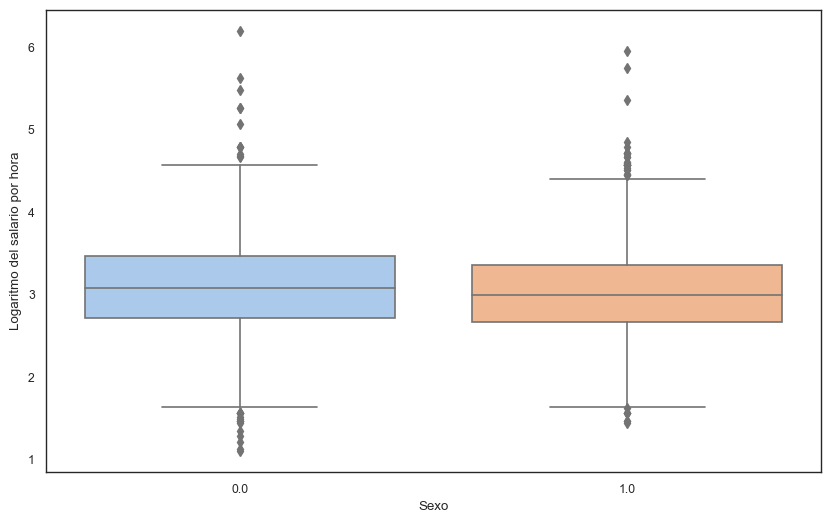

In [159]:
fig, ax = plt.subplots(figsize=(10,6))

box = sns.boxplot(x="sex", y="lwage", data=data ,palette='pastel')
plt.xlabel('Sexo')
plt.ylabel('Logaritmo del salario por hora')

# The real wage quartiles are increasing with the educational level.
# Lower salary dispersion for the postgraduate level. pastel

El promedio del logaritmo del salario es mayor para los hombres que para las mujeres

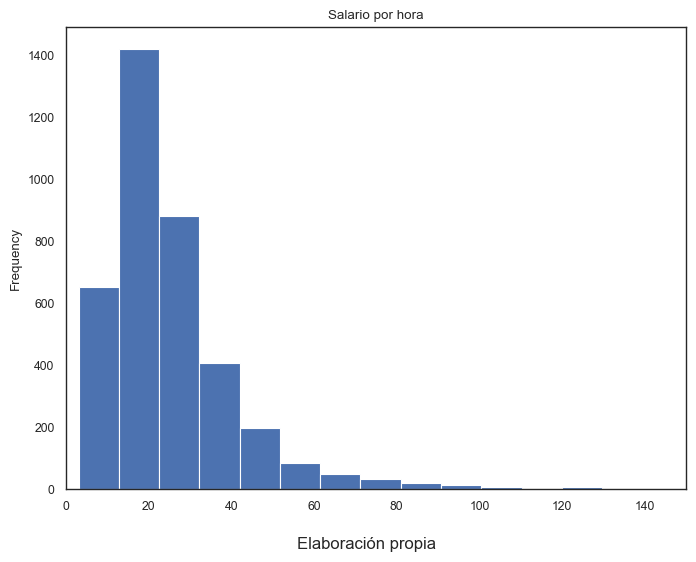

In [160]:
data['wage'].plot(kind = 'hist', bins = 50, figsize = (8,6))
plt.title('Salario por hora')

txt="Elaboración propia"  
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.xlim(0, 150)
plt.show()

El salario por hora mas frecuente es el de 20 y hay una distribucion con cola a la izquierda. El salario mas alto es el de 130.

Para las mujeres, 

<AxesSubplot:xlabel='exp1', ylabel='lwage'>

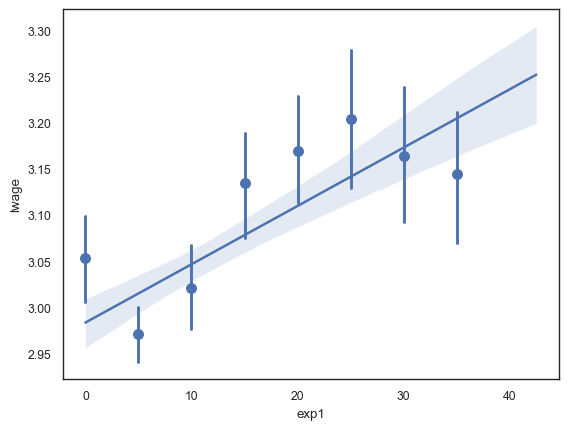

In [161]:
sns.regplot(data=data, x="exp1", y="lwage", x_bins=np.arange(0, 40, 5), order=1)

In [170]:
#A mas anos de experiencia, las personas consiguen un mayor salario.

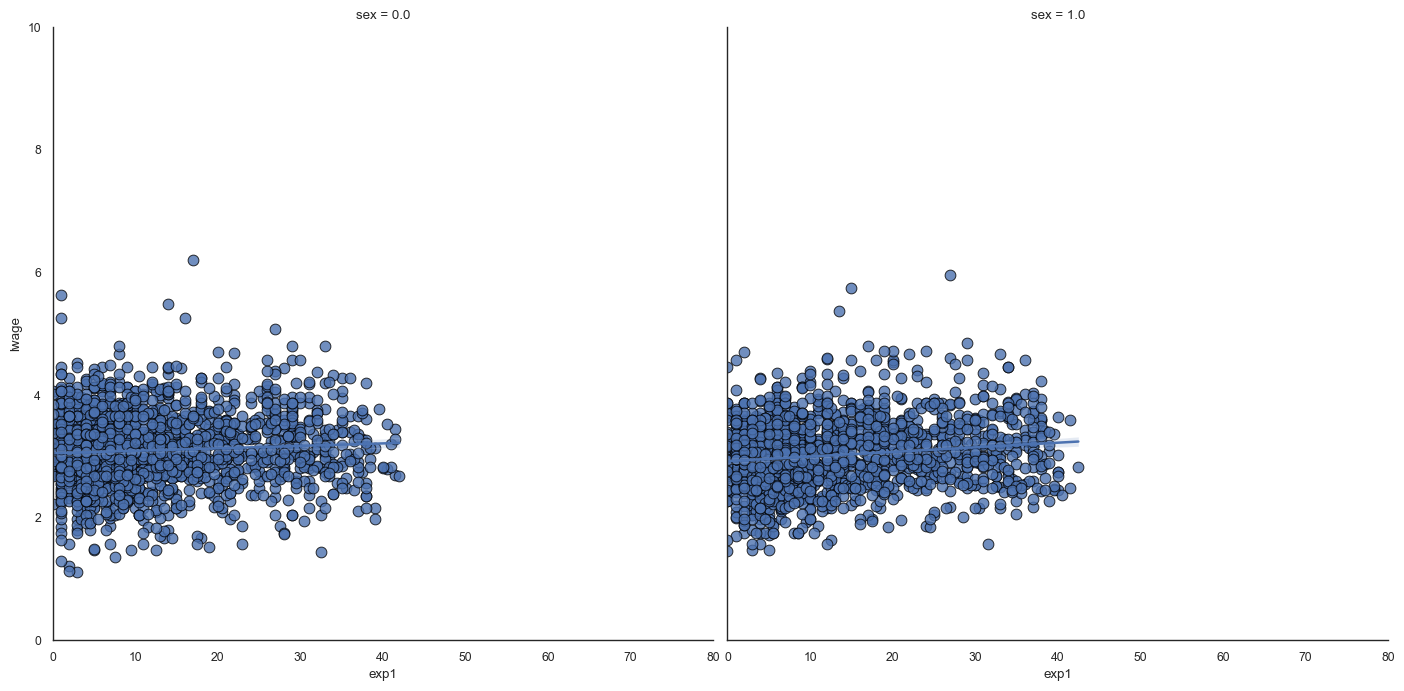

In [171]:
sns.set_style("white")
gridobj = sns.lmplot(x="exp1", y="lwage", 
                     data=data, 
                     height=7, 
                     robust=True, 
                     palette='Set1', 
                     col="sex",
                     scatter_kws=dict(s=60, linewidths=0.7, edgecolors='black'))

gridobj.set(xlim=(0, 80), ylim=(0, 10))
plt.show()

A simple vista, se ve que la experiencia impacta positivamente en el salario. Pero, en las mujeres ese efecto es menor que en los hombres debido a las brechas de genero persistentes en el mercado laboral.

Plot the confidence Interval of sex's coefficient for a different models (basic, control, and partially out). All three coefficients must be in one figure. Explain what you find.

       coef       err             varname
0 -0.075032  0.018374          No control
1 -0.067634  0.016765       Con controles
2 -0.067634  0.016765  Parcialmente fuera


C:\Users\Frank\AppData\Local\Temp\ipykernel_19340\236510229.py:19: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  ax.scatter(x=pd.np.arange(coef_df.shape[0]),


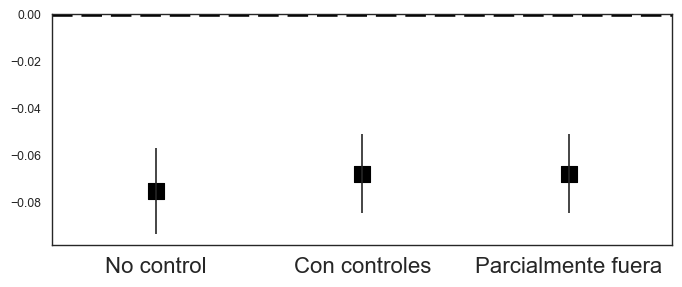

In [173]:
coef_df = pd.DataFrame({
    'coef': [nocontrol_est, control_est, partial_est],
    'err': [nocontrol_se2, control_se, partial_se],
    'varname': ['No control', 'Con controles', 'Parcialmente fuera']
})

# Reorganizar las columnas
coef_df = coef_df[['coef', 'err', 'varname']]

# Mostrar el dataframe
print(coef_df)

fig, ax = plt.subplots(figsize=(8, 3))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['No control', 'Con controles', 'Parcialmente fuera'], 
                       rotation=0, fontsize=16)


Los coeficientes son mayores para los modelos de Con controles y parcialmente fuera, cuando se restringe la muestra para las personas con educacion avanzada. Asimismo, el error se minimiza cuandos ewe usan los dos ultimos mnodelos, por lo que el intervalo de confianza es menor.

You will also include a replication of the next figure for both groups, female and male.You will have only two plotted lines (Actual/Predicted(fitted)) for these College-educated workers. You have to create two separate figures, one for female and one for male. Could you explain the different patterns that you find?

Empty DataFrame
Columns: [exp2, Promlwageo, PromMov]
Index: []
   exp2  Promlwageo   PromMov
0  0.01    3.031143  3.031143
1  0.04    3.019492  3.025765
2  0.09    3.061553  3.036540
3  0.16    3.070771  3.043327
4  0.25    3.030900  3.041500
Empty DataFrame
Columns: [exp2, Predict, PromMovP]
Index: []
   exp2   Predict   PromMov
0  0.01  3.026168  3.026168
1  0.04  3.014208  3.020648
2  0.09  3.070811  3.035751
3  0.16  3.072966  3.043130
4  0.25  3.076432  3.048027


C:\Users\Frank\AppData\Local\Temp\ipykernel_19340\1619846748.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predict'] = predict


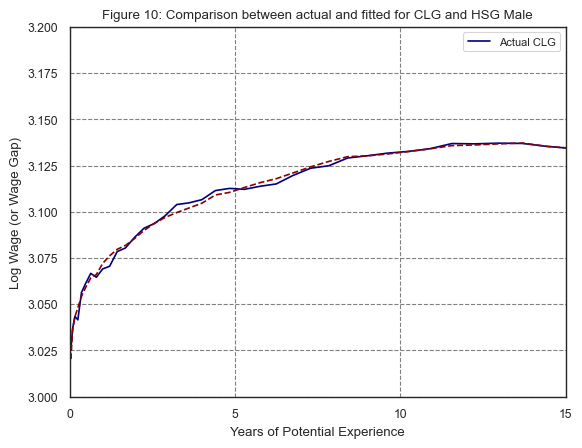

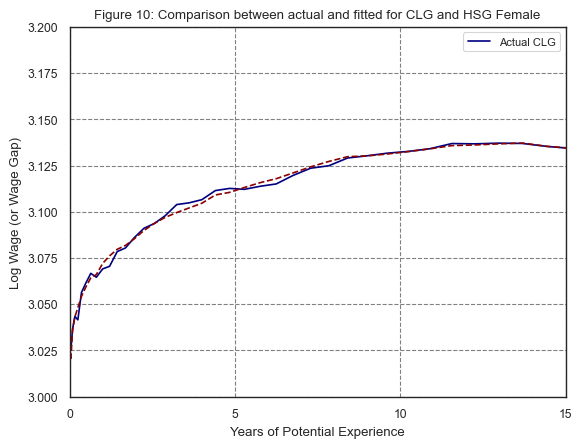

In [187]:
# In[ ]:





# Los patrones que se encuentran son que los salarios son mayores para las personas que asisten a la universidad que de los que asisten solo a la secundaria. Luego, la relacion de los anos de experiencia en el salario solo es positiva, tanto para universidad y secundaria, hasta antes de que se llegue a los 35 anos de experiencia.


data_hsg = data[data['hsg'] == 1]
data_clg = data[data['clg'] == 1]
data_scl = data[data['scl'] == 1]

data_clgm = data_clg[data_clg['sex'] == 0]  # Hombres
data_clgf = data_clg[data_clg['sex'] == 1]  # Mujeres



import pandas as pd

# Tabla_hsg
Tabla_hsg = data_hsg.groupby('exp2').agg(Promlwageo=('lwage', 'mean')).reset_index()

nivel_hsg = sorted(data_hsg['exp2'].unique())

Promedio = []
for nivel in nivel_hsg:
    Promedio.append(data_hsg[data_hsg['exp2'] <= nivel]['lwage'].mean())

Tabla_hsg['PromMov'] = Promedio
print(Tabla_hsg.head())

# Tabla_clg
Tabla_clg = data_clg.groupby('exp2').agg(Promlwageo=('lwage', 'mean')).reset_index()

Tabla_clgm = data_clg.groupby('exp2').agg(Promlwageo=('lwage', 'mean')).reset_index()
Tabla_clgf = data_clg.groupby('exp2').agg(Promlwageo=('lwage', 'mean')).reset_index()

nivel_clg = sorted(data_clg['exp2'].unique())
nivel_clgm = sorted(data_clgm['exp2'].unique())
nivel_clgf = sorted(data_clgf['exp2'].unique())

Promedio = []
for nivel in nivel_clg:
    Promedio.append(data_clg[data_clg['exp2'] <= nivel]['lwage'].mean())

Tabla_clg['PromMov'] = Promedio
Tabla_clgm['PromMov'] = Promedio
Tabla_clgf['PromMov'] = Promedio
print(Tabla_clg.head())

import statsmodels.api as sm
import pandas as pd

# Definir la fórmula del modelo
formula = 'lwage ~ sex + (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+occ2+ind2+mw+so+we)'

# Ajustar el modelo
control_fit1 = sm.formula.ols(formula, data=data).fit()

# Hacer predicciones
predict = control_fit1.predict(data)

# Añadir las predicciones al DataFrame original
data['Predict'] = predict

# Filtrar datos para scl y clg
data_sclP = data[data['scl'] == 1]
data_clgP = data[data['clg'] == 1]
data_hsgP = data[data['hsg'] == 1]

data_clgPm = data_clgP[data_clgP['sex'] == 0]  # Hombres
data_clgPf = data_clgP[data_clgP['sex'] == 1]  # Mujeres

import pandas as pd
###########################################################
# Using "sclP"
Tabla_hsgP = data_hsgP.groupby('exp2')['Predict'].mean().reset_index()

nivel_hsgP = sorted(data_hsgP['exp2'].unique())

Promedio = []
for nivel in nivel_hsgP:
    Promedio.append(data_hsgP[data_hsgP['exp2'] <= nivel]['Predict'].mean())

Tabla_hsgP['PromMovP'] = Promedio
print(Tabla_hsgP.head())

# Repeat for "clgP"
Tabla_clgP = data_clgP.groupby('exp2')['Predict'].mean().reset_index()
Tabla_clgPf = data_clgPf.groupby('exp2')['Predict'].mean().reset_index()
Tabla_clgPm = data_clgPm.groupby('exp2')['Predict'].mean().reset_index()

nivel_clgP = sorted(data_clgP['exp2'].unique())

Promedio = []
for nivel in nivel_clgP:
    Promedio.append(data_clgP[data_clgP['exp2'] <= nivel]['Predict'].mean())

Tabla_clgP['PromMov'] = Promedio
Tabla_clgPf['PromMov'] = Promedio

Promediof = Promedio[:-1]
Tabla_clgPm['PromMov'] = Promediof
print(Tabla_clgP.head())

import matplotlib.pyplot as plt

# Datos
x = Tabla_clg['exp2']
x_3 = Tabla_clgPm['exp2']
y = Tabla_clg['PromMov']
y_3 = Tabla_clgPm['PromMov']

# Crear el gráfico
plt.plot(x, y, color='navy', linestyle='-', label="Actual CLG")

plt.plot(x_3, y_3, color='darkred', linestyle='--')

# Ajustes del gráfico
plt.ylim(3, 3.2)
plt.xlim(0, 15)
plt.xlabel("Years of Potential Experience")
plt.ylabel("Log Wage (or Wage Gap)")
plt.title("Figure 10: Comparison between actual and fitted for CLG and HSG Male")
plt.grid(linestyle='--', color='gray')

# Marcas de los ejes
plt.xticks(range(0, 16, 5))

# Leyenda
plt.legend(loc="upper right", fontsize=8)

# Mostrar el gráfico
plt.show()

# Datos
x = Tabla_clg['exp2']
x_3 = Tabla_clgPf['exp2']
y = Tabla_clg['PromMov']
y_3 = Tabla_clgPf['PromMov']

# Crear el gráfico
plt.plot(x, y, color='navy', linestyle='-', label="Actual CLG")

plt.plot(x_3, y_3, color='darkred', linestyle='--')

# Ajustes del gráfico
plt.ylim(3, 3.2)
plt.xlim(0, 15)
plt.xlabel("Years of Potential Experience")
plt.ylabel("Log Wage (or Wage Gap)")
plt.title("Figure 10: Comparison between actual and fitted for CLG and HSG Female")
plt.grid(linestyle='--', color='gray')

# Marcas de los ejes
plt.xticks(range(0, 16, 5))

# Leyenda
plt.legend(loc="upper right", fontsize=8)

# Mostrar el gráfico
plt.show()

Los patrones que se encuentran son que los salarios son mayores para las personas que asisten a la universidad que de los que asisten solo a la secundaria. Luego, la relacion de los anos de experiencia en el salario solo es positiva, tanto para universidad y secundaria, hasta antes de que se llegue a los 35 anos de experiencia. Luego, si diferenciamos entre sexo la diferencia es muy pequeña.